In [267]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from itertools import combinations
from copy import deepcopy

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.set_option('expand_frame_repr', False)

dataset = pd.read_csv('dataset.csv')

print(dataset.shape)
print(dataset.columns)
print(dataset.head)

(210, 8)
Index(['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
       'asymmetry_coefficient', 'groove_length', 'variety'],
      dtype='object')
<bound method NDFrame.head of       area  perimeter  compactness  kernel_length  kernel_width  asymmetry_coefficient  groove_length  variety
0    15.26      14.84       0.8710          5.763         3.312                  2.221          5.220        1
1    14.88      14.57       0.8811          5.554         3.333                  1.018          4.956        1
2    14.29      14.09       0.9050          5.291         3.337                  2.699          4.825        1
3    13.84      13.94       0.8955          5.324         3.379                  2.259          4.805        1
4    16.14      14.99       0.9034          5.658         3.562                  1.355          5.175        1
5    14.38      14.21       0.8951          5.386         3.312                  2.462          4.956        1
6    14.69      14.49    

In [28]:
#Create 3 DataFrame for each Species
cluster = []
for i in range(3):
    cluster += [dataset[dataset['variety']==(i+1)]]
    print(cluster[i])

     area  perimeter  compactness  kernel_length  kernel_width  asymmetry_coefficient  groove_length  variety
0   15.26      14.84       0.8710          5.763         3.312                  2.221          5.220        1
1   14.88      14.57       0.8811          5.554         3.333                  1.018          4.956        1
2   14.29      14.09       0.9050          5.291         3.337                  2.699          4.825        1
3   13.84      13.94       0.8955          5.324         3.379                  2.259          4.805        1
4   16.14      14.99       0.9034          5.658         3.562                  1.355          5.175        1
5   14.38      14.21       0.8951          5.386         3.312                  2.462          4.956        1
6   14.69      14.49       0.8799          5.563         3.259                  3.586          5.219        1
7   14.11      14.10       0.8911          5.420         3.302                  2.700          5.000        1
8   16.63 

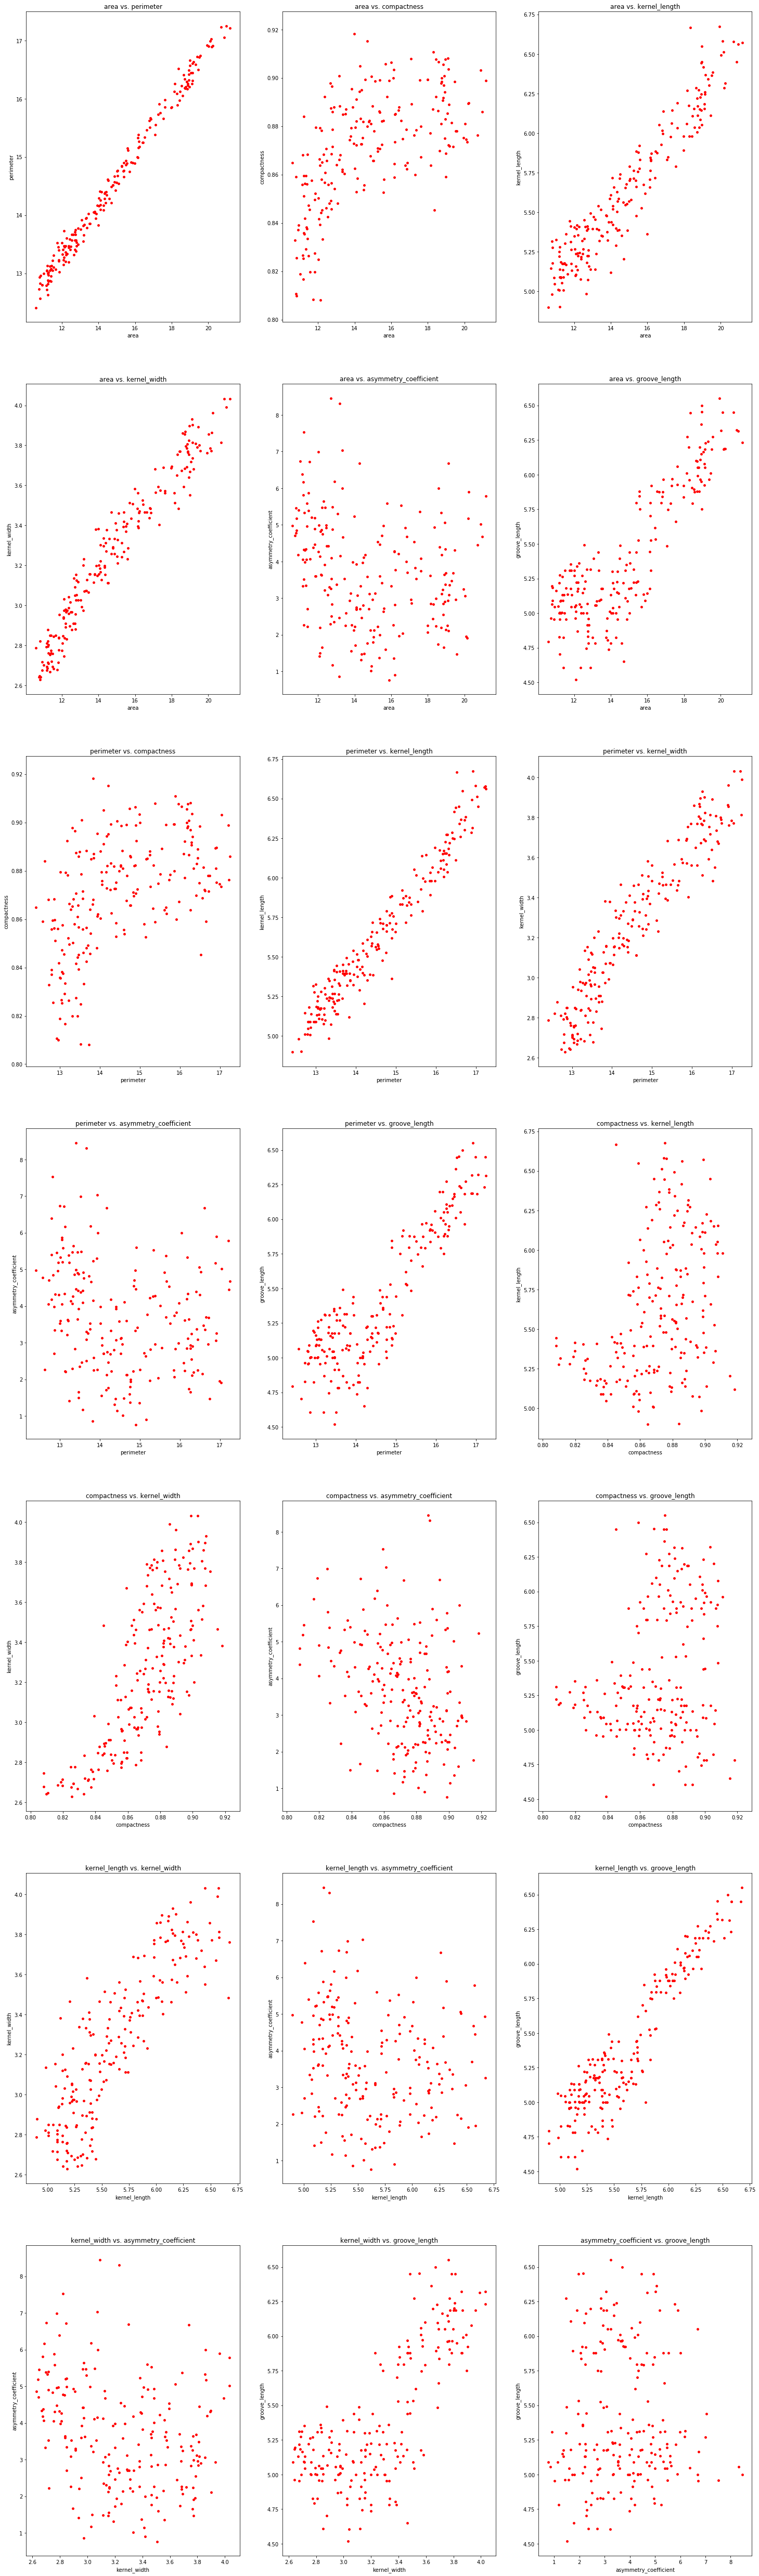

In [17]:
# Plot each 2 attribute, with no cluster
plt.figure()
fig,ax=plt.subplots(7,3,figsize=(25, 90))
count = 0
for column in combinations(dataset.columns[:7], 2):
    idj = count%3
    idi = count//3
    ax[idi][idj].scatter(dataset[column[0]].values, dataset[column[1]].values, c='r', s=15)
    ax[idi][idj].set(title=column[0]+' vs. '+column[1], xlabel=column[0], ylabel=column[1])
    count += 1
    

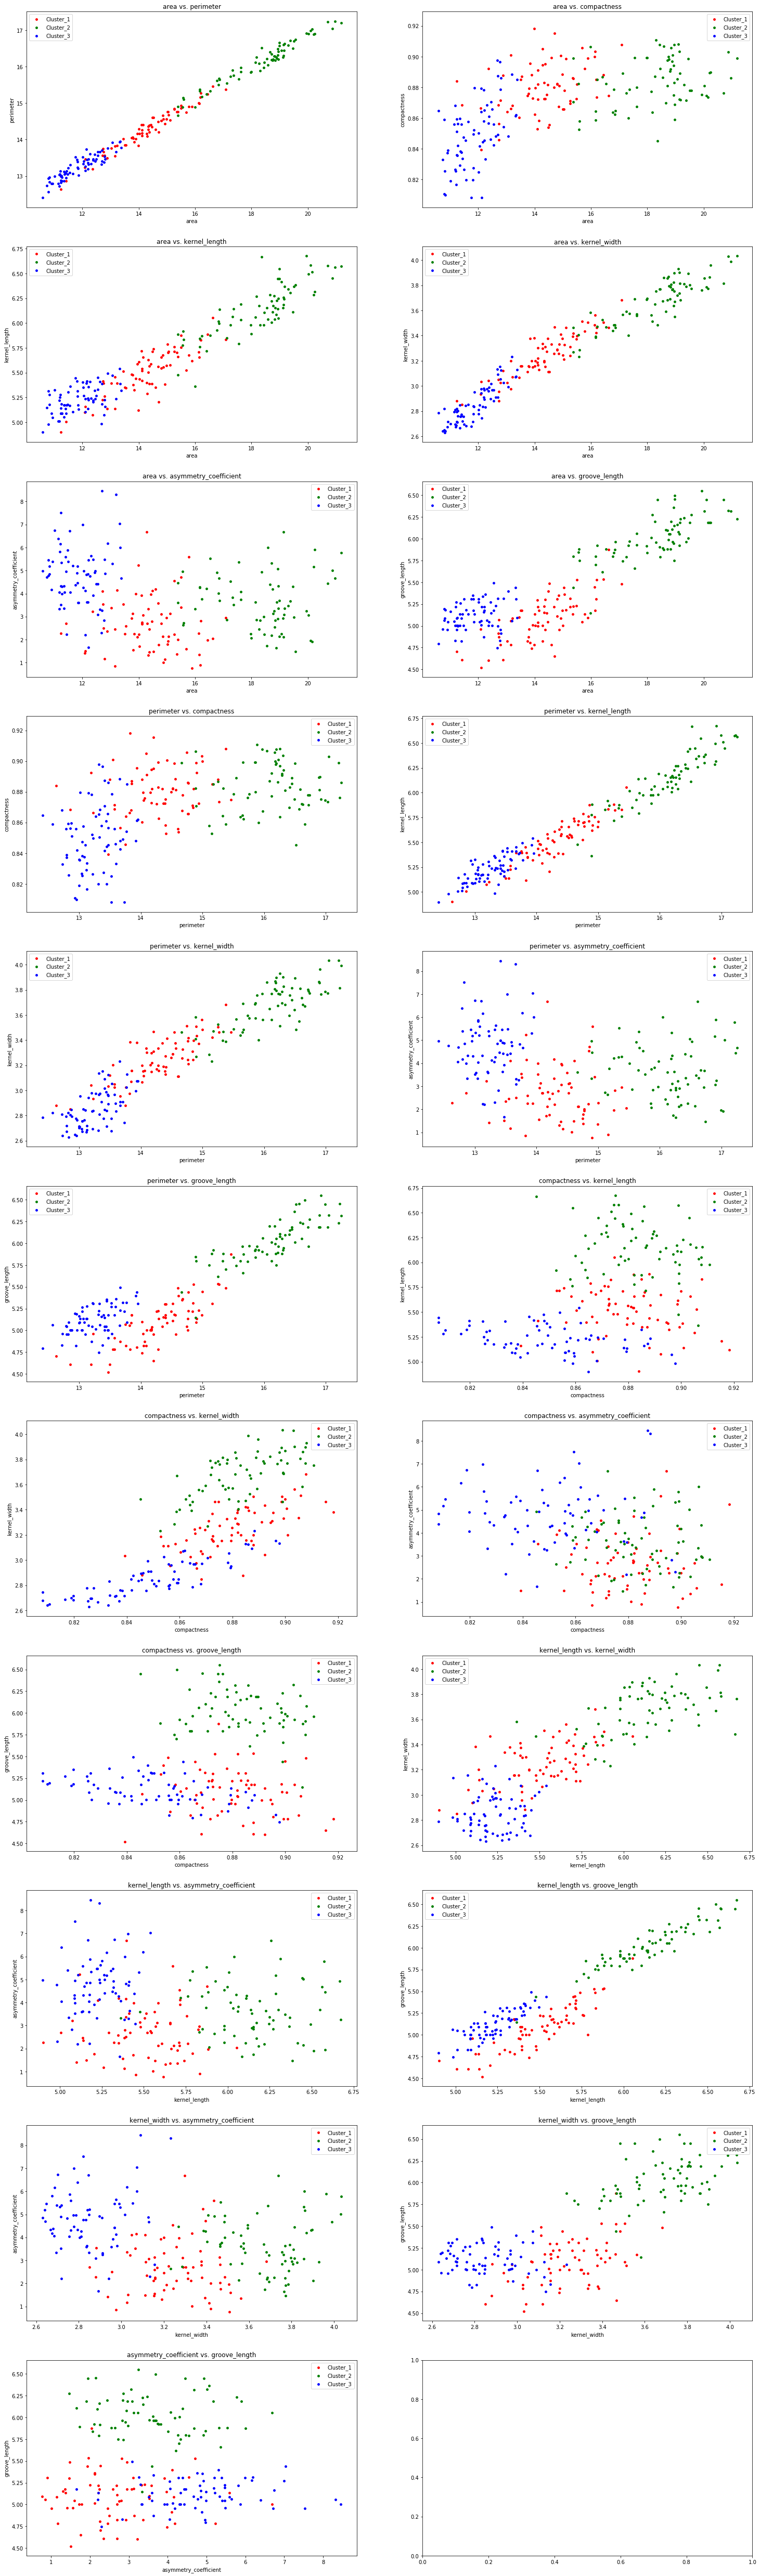

In [29]:
# Plot each 2 attribute, with cluster
plt.figure()
fig,ax=plt.subplots(11,2,figsize=(25, 90))
count = 0
color = ['r', 'g', 'b']
for column in combinations(dataset.columns[:7], 2):
    idj = count%2
    idi = count//2
    for i in range(3):
        ax[idi][idj].scatter(cluster[i][column[0]].values, cluster[i][column[1]].values,
                             c=color[i], label='Cluster_'+str(i+1), s=15)
    ax[idi][idj].set(title=column[0]+' vs. '+column[1], xlabel=column[0], ylabel=column[1])
    ax[idi][idj].legend()
    count += 1


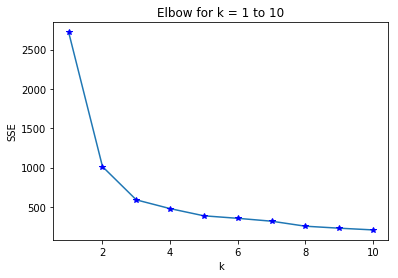

<Figure size 432x288 with 0 Axes>

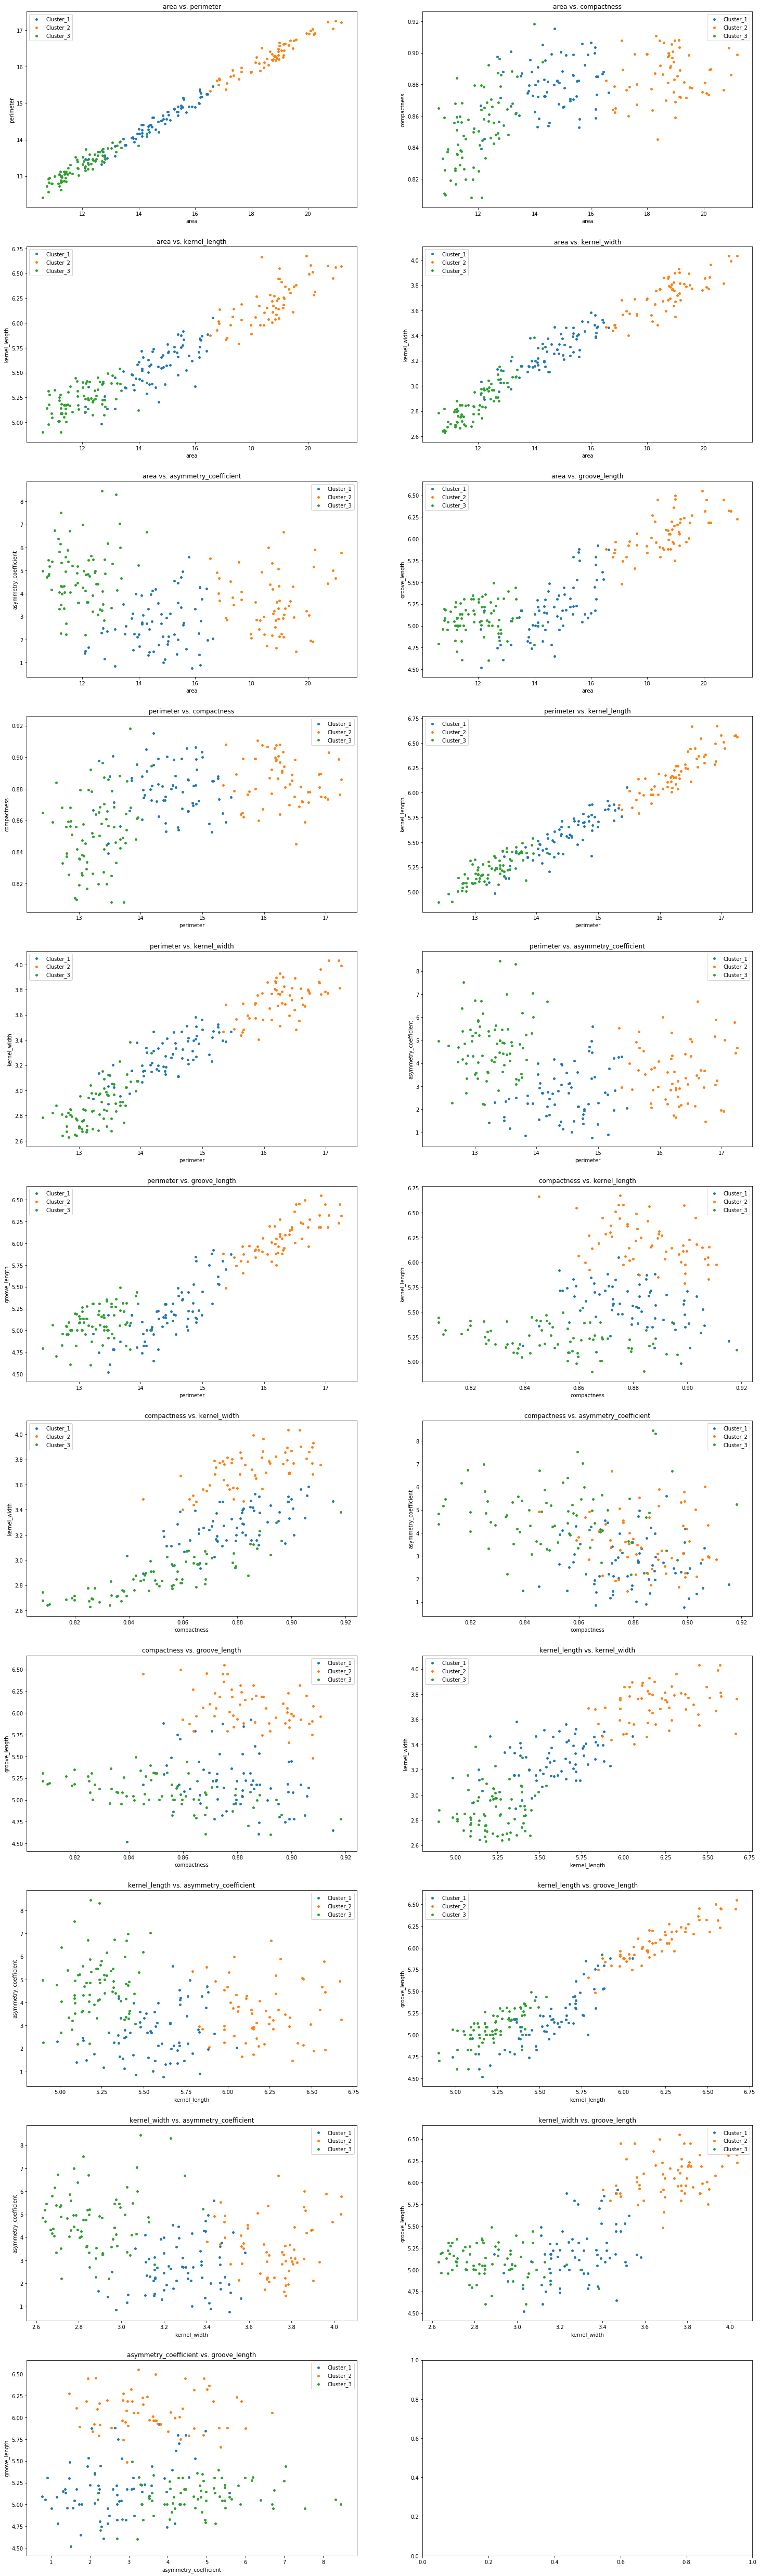

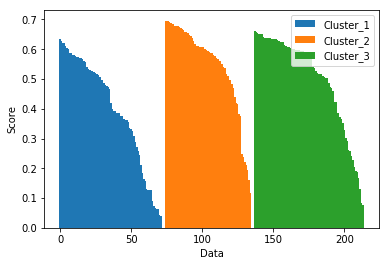

In [354]:
import random
from itertools import combinations
from copy import deepcopy
from math import acos, pi, ceil

class KMeans(object):
    def __init__(self, dataset, k = 2, keycols = [], epsilon = 0.0001, with_output = False):
        self.dataset = dataset
        self.k = k
        self.keycols = keycols
        self.epsilon = epsilon
        self.with_output = with_output

    def run(self):
        self.data = self.__generate_data()
        self.centroids = self.__generate_centroids()

        centroids_temp = np.zeros(self.centroids.shape)

        self.clusters = np.zeros(len(self.data))

        error = self.__distance(self.centroids, centroids_temp, None)

        while error >= self.epsilon:
            for idx in range(len(self.data)):
                dist = self.__distance(self.data[idx], self.centroids)
                cluster = np.argmin(dist)
                self.clusters[idx] = cluster

            centroids_temp = deepcopy(self.centroids)
            for idx in range(self.k):
                points = [self.data[jdx] for jdx in range(len(self.data)) if self.clusters[jdx] == idx]
                if not points:
                    ranidx = random.randint(0, len(self.data)-1)
                    points = [self.data[ranidx]]
                    self.clusters[ranidx] = idx
                self.centroids[idx] = np.mean(points, axis=0)
            error = self.__distance(self.centroids, centroids_temp, None)

    def show_clusters(self):
        print(self.clusters)

    def plot(self):
        nrow = ceil((len(self.keycols)*(len(self.keycols)-1))/4)
        plt.figure()
        fig,ax=plt.subplots(nrow, 2, figsize=(25, 90))
        count = 0
        color = [
            'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
            'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'
        ]
        for column in combinations(self.keycols, 2):
            idj = count%2
            idi = count//2
            px = []
            py = []
            for i in range(self.k):
                px += [[self.dataset[column[0]].values[j] for j in range(self.dataset.shape[0]) if self.clusters[j] == i]]
                py += [[self.dataset[column[1]].values[j] for j in range(self.dataset.shape[0]) if self.clusters[j] == i]]
            
            for i in range(self.k):
                ax[idi][idj].scatter(px[i], py[i], c=color[i], label='Cluster_'+str(i+1), s=15)
            ax[idi][idj].set(title=column[0]+' vs. '+column[1], xlabel=column[0], ylabel=column[1])
            ax[idi][idj].legend()
            count += 1
        plt.show()
        
    def sse(self, k = 0):
        if not k:
            k = self.k
        sum = 0
        for c in range(self.k):
            points = [self.data[j] for j in range(len(self.data)) if self.clusters[j] == c]
            for p in points:
                sum += self.__distance(p, self.centroids[c], None)**2
        return sum
    
    def elbow(self, k_start = 1, k_end = 2):
        # store old val to temp
        k_temp = deepcopy(self.k)
        clusters_temp = deepcopy(self.clusters)
        
        sse = []
        for k in range(k_start, k_end+1):
            self.k = k
            self.run()
            sse += [self.sse(k)]
            #rint("Cluster", k, "SSE", sse)
        points = np.array(list(zip(range(k_start, k_end+1), sse)))
        plt.plot(range(k_start, k_end+1), sse)
        plt.plot(range(k_start, k_end+1), sse, 'b*')
        
        #angle
        '''
        deg = [999]
        for k in range(1, len(points)-1):
            #print(points[k-1], points[k], points[k+1])
            a = self.__distance(points[k], points[k-1], None)
            b = self.__distance(points[k], points[k+1], None)
            c = self.__distance(points[k+1], points[k-1], None)
            temp = acos((a*a + b*b - c*c)/(2*a*b)) * 180/pi
            #print(temp)
            if deg[k-1] < temp:
                temp = 360 - temp
            deg += [temp]
            #print(temp)
                        
        deg += [999]
        '''
        
        plt.title('Elbow for k = '+str(k_start)+' to '+str(k_end))
        plt.xlabel('k')
        plt.ylabel('SSE')
        plt.show()
        
        # restore old val
        self.k = deepcopy(k_temp)
        self.clusters = deepcopy(clusters_temp)
        
    def silhouette(self):
        cluster = [[] for _ in range(self.k)]
        for i in range(len(self.data)):
            cluster[int(self.clusters[i])].append(self.data[i])
        
        sil_plot = [[] for _ in range(self.k)]
        for i in range(len(self.data)):
            a = np.mean(np.linalg.norm(cluster[int(self.clusters[i])]-self.data[i], axis=1))
            b = 999999999999999999 # INF
            for k in range(self.k):
                if k == int(self.clusters[i]):
                    continue
                b = np.min([b, np.mean(np.linalg.norm(cluster[k]-self.data[i], axis=1))])
                
            sil = (b-a)/np.max([a, b])
            sil_plot[int(self.clusters[i])].append(sil)
            
        for k in range(self.k):
            sil_plot[k].sort(reverse = True)
            
        fig, ax = plt.subplots()
        color = [
            'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
            'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'
        ]
        bar_width = 1
        prev = 0
        for k in range(self.k):
            index = np.arange(len(sil_plot[k])) + prev
            ax.bar(index, sil_plot[k], bar_width, color=color[k], label='Cluster_'+str(k+1))
            prev += len(sil_plot[k]) + 2
        ax.set_ylabel('Score')
        ax.set_xlabel('Data')
        ax.legend()
        plt.show()
        
    def get_score(self):
        if not self.with_output:
            print('Output column not defined. Cannot get score!')
            return
        
        output_column = list(self.dataset.columns)[-1]
        
        # get clusters name
        freq_table = [{} for _ in range(self.k)]
        clusters_name = pd.unique(self.dataset[output_column].values)
        for i in range(self.dataset.shape[0]):
            x = self.dataset[output_column].values[i]
            if x in freq_table[int(self.clusters[i])]:
                freq_table[int(self.clusters[i])][x] += 1
                continue
            freq_table[int(self.clusters[i])][x] = 1
        trans_table = []
        for i in range(self.k):
            trans_table += [max(freq_table[i], key=freq_table[i].get)]

        print(freq_table)
        print(trans_table)
        
        count = int(self.dataset.shape[0])
        for i in range(self.dataset.shape[0]):
            if trans_table[int(self.clusters[i])] != self.dataset[output_column].values[i]:
                count-=1

        print('Score : %.4f' % ((count/self.dataset.shape[0])*100))

    def __distance(self, p1, p2, axis = 1):
        return np.linalg.norm(p1-p2, axis=axis)

    def __generate_data(self):
        axis = []
        if not self.keycols:
            self.keycols = list(self.dataset.columns)
            if self.with_output:
                self.keycols = self.keycols[:len(self.keycols)-1]
        for col in self.keycols:
            axis += [self.dataset[col].values]
        
        return np.array(list(zip(*axis)), dtype=np.float32)

    def __generate_centroids(self):
        centroids = []
        for i in range(len(self.keycols)):
            centroids += [
                np.random.randint(
                            np.min(self.data[:, i])-1,
                            np.max(self.data[:, i])+1,
                            size = self.k
                )
            ]
        
        return np.array(list(zip(*centroids)), dtype=np.float32)

    def set_k(self, k):
        self.k = k

    def get_k(self):
        return self.k

    def set_keycols(self, keycols):
        self.keycols = keycols

    def get_keycols(self):
        return self.keycols

a = KMeans(dataset, 3, with_output = True)
a.run()
#a.show_clusters()
a.elbow(1, 10)
a.plot()
#a.get_score()
a.silhouette()